In [ ]:
import pandas as pd

# Get train and test datasets and combine
df = pd.read_csv('/content/CONDA_train.csv')
df1  = pd.read_csv('/content/CONDA_valid.csv')

df = pd.concat([df, df1])
print(len(df))
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()
df.head()

35895


,index,utterance,intentClass
0,0,wow!,O
1,1,WTF,O
2,2,wpe wpe,O
3,3,hahaha,O
4,4,wtf,O


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['utterance'])
print(vectorizer.get_stop_words()) 

None


In [ ]:
print(X[0])

  (0, 10662)	1.0


In [ ]:
feature_names = vectorizer.get_feature_names() 
#get tfidf vector for first document 
first_document_vector= X[26] 
#print the scores 
df2 = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df2.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
invoker,0.648631
mid,0.485939
noob,0.483833
gg,0.330222
00,0.000000
...,...
frank,0.000000
frankfurt,0.000000
fraps,0.000000
frduikfaimcl,0.000000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize dataset
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['utterance'])
df2 = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names()) 
df2.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000000000000000,0162282307,025,040,06,0coins,0o,0v5,...,ｐｅｒｕ,ｒａｍｐａｇｅ,ｓｈｅ,ｓｉｓｉｓｉｎｇ,ｓｐｅａｋ,ｓｔｏｐ,ｔｏ,ｔｒｙｉｎｇ,ｖｉｖａ,ｘｄｘｄｘ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2['intentClass'] = df['intentClass']
df2.head()

,00,000,000000000000000,0162282307,025,040,06,0coins,0o,0v5,...,ｒａｍｐａｇｅ,ｓｈｅ,ｓｉｓｉｓｉｎｇ,ｓｐｅａｋ,ｓｔｏｐ,ｔｏ,ｔｒｙｉｎｇ,ｖｉｖａ,ｘｄｘｄｘ,intentClass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,O


In [ ]:
def list_token(doc , ack):
 temp1=pd.DataFrame(doc).transpose()
 temp2 = temp1.loc[:, (temp1 != 0).any(axis=0)]
 if ack==0:
  freq = temp2.drop(['intentClass'], axis=1)
 else:
  freq = temp2.drop(['intentClass'], axis=1)
 list_words =freq.columns.tolist()
 return list_words


word_cl_dic={}
n = len(df2)
for i in range(0,len(df2)):
    dt=df2.iloc[i,]
    lst_words=list_token(dt,0)
    cl=dt['intentClass']
    for w in set(lst_words):
        word_cl_dic[w]=word_cl_dic.get(w,{})
        word_cl_dic[w][cl]=word_cl_dic[w].get(cl,0)
        word_cl_dic[w][cl]+=1

print(word_cl_dic)

{'wow': {'O': 161, 'E': 21, 'A': 5, 'I': 5}, 'wtf': {'O': 266, 'E': 74, 'A': 15, 'I': 19}, 'wpe': {'O': 1}, 'hahaha': {'O': 323, 'E': 26, 'I': 14, 'A': 4}, 'cant': {'E': 38, 'O': 150, 'I': 12, 'A': 16}, 'trash': {'E': 136, 'A': 2, 'O': 1, 'I': 2}, 'play': {'E': 54, 'I': 18, 'O': 142, 'A': 10}, 'with': {'E': 88, 'O': 179, 'A': 16, 'I': 20}, 'sepa': {'E': 2101, 'O': 5637, 'A': 812, 'I': 747}, 'bg': {'O': 29, 'I': 1, 'E': 3, 'A': 2}, 'ty': {'O': 375, 'A': 92, 'E': 20, 'I': 6}, 'gg': {'A': 95, 'E': 188, 'O': 2969, 'I': 126}, 'report': {'A': 770, 'I': 38, 'E': 169, 'O': 12}, 'rat': {'A': 3, 'O': 31, 'E': 10, 'I': 3}, 'my': {'A': 41, 'E': 207, 'O': 353, 'I': 45}, 'team': {'A': 52, 'E': 292, 'O': 276, 'I': 38}, 'please': {'A': 112, 'O': 142, 'E': 36, 'I': 11}, 'mid': {'I': 220, 'O': 323, 'E': 125, 'A': 23}, 'ez': {'I': 1392, 'E': 150, 'O': 18, 'A': 14}, 'hahah': {'O': 61, 'I': 4, 'E': 5}, 'fuck': {'E': 617, 'O': 64, 'I': 4, 'A': 2}, 'always': {'E': 30, 'O': 52, 'I': 2, 'A': 1}, 'arrows': {'E'

In [ ]:
word_features={}
k=1000000

num_doc_cl=df.groupby(['intentClass'])['utterance'].count()
print(num_doc_cl)

intentClass
A     2299
E     4711
I     2274
O    26603
Name: utterance, dtype: int64


In [ ]:
print(len(df))

35887


In [ ]:
import operator
from math import log

# Calculate PMI scores for each word based on class
for w in word_cl_dic.keys():
    dic = word_cl_dic[w]
    n_kw=0
    for cl in dic.keys():
        # Number of documents in the training set where the word occurs
        n_kw+=dic[cl]
    for cl in dic.keys():
        word_features[cl]=word_features.get(cl,[])
        n_kw_cl=dic[cl]
        n_dev_cl=num_doc_cl.loc[cl]
        p_w=n_kw/n
        p_cl = n_dev_cl/n
        p_w_cl= n_kw_cl/n
        
        pmi=log((p_w_cl)/(p_w*p_cl))
        
        if len(word_features[cl])<k:
            word_features[cl].append((w,pmi))
            if len(word_features[cl])==k:
                word_features[cl].sort(key=operator.itemgetter(1),reverse=True)                
        else:
            if word_features[cl][k-1][1]<pmi:
                word_features[cl][k-1]= (w,pmi)
                word_features[cl].sort(key=operator.itemgetter(1),reverse=True)    

print(word_features)

{'O': [('wow', 0.12326011449594705), ('wtf', -0.041408367093567336), ('wpe', 0.29935112153926563), ('hahaha', 0.1716415967073519), ('cant', -0.06529199204864351), ('trash', -4.649408768838903), ('play', -0.15646787271451368), ('with', -0.22699587812934868), ('sepa', -0.20098863683501747), ('bg', 0.11129889003632595), ('ty', 0.025767973466986196), ('gg', 0.17029249893528017), ('report', -4.112436560295446), ('rat', -0.11680927568564671), ('my', -0.30498032531003966), ('team', -0.5694529440689017), ('please', -0.4519320856083495), ('mid', -0.46113637900574767), ('ez', -4.1716525495419186), ('hahah', 0.16172974366321796), ('fuck', -2.074100087323412), ('always', -0.1920564163696235), ('arrows', -0.17065250770646984), ('decent', 0.19399060588143924), ('gh', 0.29935112153926563), ('at', -0.10611398656889866), ('engage', 0.29935112153926563), ('bot', -0.23661047549826744), ('then', -0.02095617822859185), ('lc', -0.1349344251043906), ('top', -0.1392661938857993), ('takle', 0.29935112153926563

In [ ]:
def Sort_Tuple(tup):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    tup.sort(key = lambda x: x[1])
    return tup
 
# printing the sorted list of tuples
print([i for i in Sort_Tuple(word_features['O']) if i[1] < -0.7])

[('trash', -4.649408768838903), ('retard', -4.568183328916317), ('ez', -4.1716525495419186), ('report', -4.112436560295446), ('w8', -3.9911083196091255), ('noobs', -3.6324745111850603), ('fuckin', -3.311566791104959), ('idiot', -3.267360698600463), ('faggot', -3.255996939950148), ('comend', -3.2270094030768957), ('reported', -3.2072067757807163), ('noob', -3.124769900024827), ('izi', -3.0679447084472082), ('fucking', -2.977793611452911), ('suck', -2.9490835055704796), ('shitty', -2.919524703328935), ('gay', -2.850531831841984), ('fucker', -2.8141641876711088), ('stfu', -2.7451713161841576), ('stupid', -2.6710633440304354), ('asshole', -2.591020636356899), ('fking', -2.591020636356899), ('idiots', -2.5723285033447465), ('sucks', -2.5338622225169503), ('shit', -2.507370607069974), ('peruvians', -2.4732376007005157), ('afk', -2.41423925993856), ('nigga', -2.4086990795629446), ('fuckign', -2.4086990795629446), ('bitches', -2.339706208075993), ('restart', -2.339706208075993), ('fuk', -2.265

In [ ]:
# Create list of stopwords for each class based on PMI threshold
stop_o = [i[0] for i in Sort_Tuple(word_features['O']) if i[1] < -0.5]
stop_i = [i[0] for i in Sort_Tuple(word_features['I']) if i[1] < -0.5]
stop_a = [i[0] for i in Sort_Tuple(word_features['A']) if i[1] < -0.5]
stop_e = [i[0] for i in Sort_Tuple(word_features['E']) if i[1] < -0.5]


df = pd.read_csv('/content/CONDA_train.csv')
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()

count = 0

# Trim each example in dataset based on stop words list 
for i in range(len(df)):
  if df['intentClass'][i] == 'O':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_o]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'I':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_i]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'A':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_a]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  else:
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_e]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1

print(count)
# Save as new dataset
df.to_csv('CONDA_train_pmi_trimmed.csv')

<ipython-input-12-e1e119b1a6f0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-12-e1e119b1a6f0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-12-e1e119b1a6f0>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-12-e1e119b1a6f0>:26: SettingWithCopyWarning: 
A v

111


In [ ]:
# Similarly, create trimmed test dataset
df = pd.read_csv('/content/CONDA_valid.csv')
df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()

count = 0

for i in range(len(df)):
  if df['intentClass'][i] == 'O':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_o]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'I':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_i]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  elif df['intentClass'][i] == 'A':
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_a]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1
  else:
    resultwords  = [word for word in df['utterance'][i].split() if word.lower() not in stop_e]
    if len(resultwords) > 0:
      df['utterance'][i] = ' '.join(resultwords)
    else:
      count+=1

print(count)
df.to_csv('CONDA_valid_pmi_trimmed.csv')

<ipython-input-13-ed64f0014b3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-13-ed64f0014b3e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-13-ed64f0014b3e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = ' '.join(resultwords)
<ipython-input-13-ed64f0014b3e>:19: SettingWithCopyWarning: 
A v

37


In [ ]:
import pandas as pd

# Get training dataset
df = pd.read_csv('/content/CONDA_train.csv')

df = df[['utterance', 'intentClass']]
df = df.dropna()
df = df.reset_index()
df.head()

,index,utterance,intentClass
0,0,wow!,O
1,1,WTF,O
2,2,wpe wpe,O
3,3,hahaha,O
4,4,wtf,O


In [ ]:
l = []
l2 = []

# Calculate utterance length and number of utterances
for i in range(len(df)):
   utteranceL = df['utterance'][i].split()
   l2.append(utteranceL.count('[SEPA]') + 1)
   utteranceL = [i for i in utteranceL if i != '[SEPA]']
   df['utterance'][i] = " ".join(str(x) for x in utteranceL)
   l.append(len(utteranceL))

df['utteranceLength'] = l
df['utterances'] = l2
df.head()

<ipython-input-15-f6ceb289d8e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utterance'][i] = " ".join(str(x) for x in utteranceL)


,index,utterance,intentClass,utteranceLength,utterances
0,0,wow!,O,1,1
1,1,WTF,O,1,1
2,2,wpe wpe,O,2,1
3,3,hahaha,O,1,1
4,4,wtf,O,1,1


Text(0.5, 1.0, 'Distribution of utterances for class O')

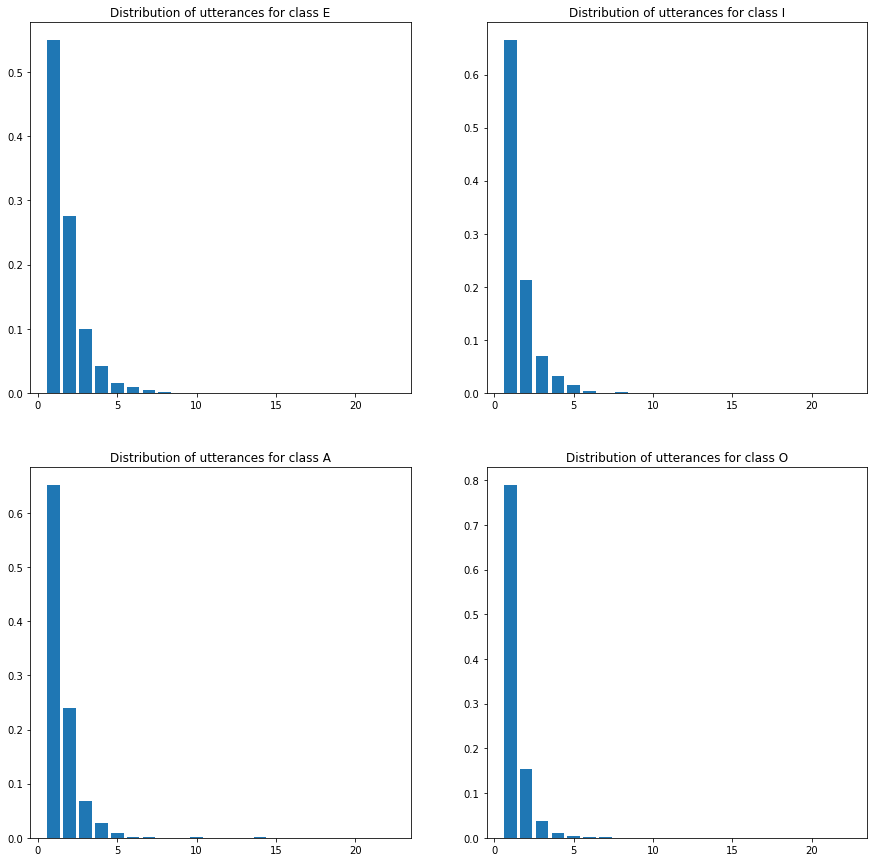

In [ ]:
import matplotlib.pyplot as plt
from pyparsing import countedArray

# Get distribution of number of utterances in groupby object
gb = df.groupby('intentClass')['utterances'].value_counts(normalize=True).unstack(fill_value=0)

num = []
countE = []
countI = []
countA = []
countO = []

for col,data in gb.iteritems():
  num.append(col)
  countE.append(data['E'])
  countI.append(data['I'])
  countA.append(data['A'])
  countO.append(data['O'])

# Plot distribution of number of utterances for each class
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].bar(num, countE)
axs[0, 0].set_title('Distribution of utterances for class E')
axs[0, 1].bar(num, countI)
axs[0, 1].set_title('Distribution of utterances for class I')
axs[1, 0].bar(num, countA)
axs[1, 0].set_title('Distribution of utterances for class A')
axs[1, 1].bar(num, countO)
axs[1, 1].set_title('Distribution of utterances for class O')

Text(0.5, 1.0, 'Distribution of utterance lengths for class O')

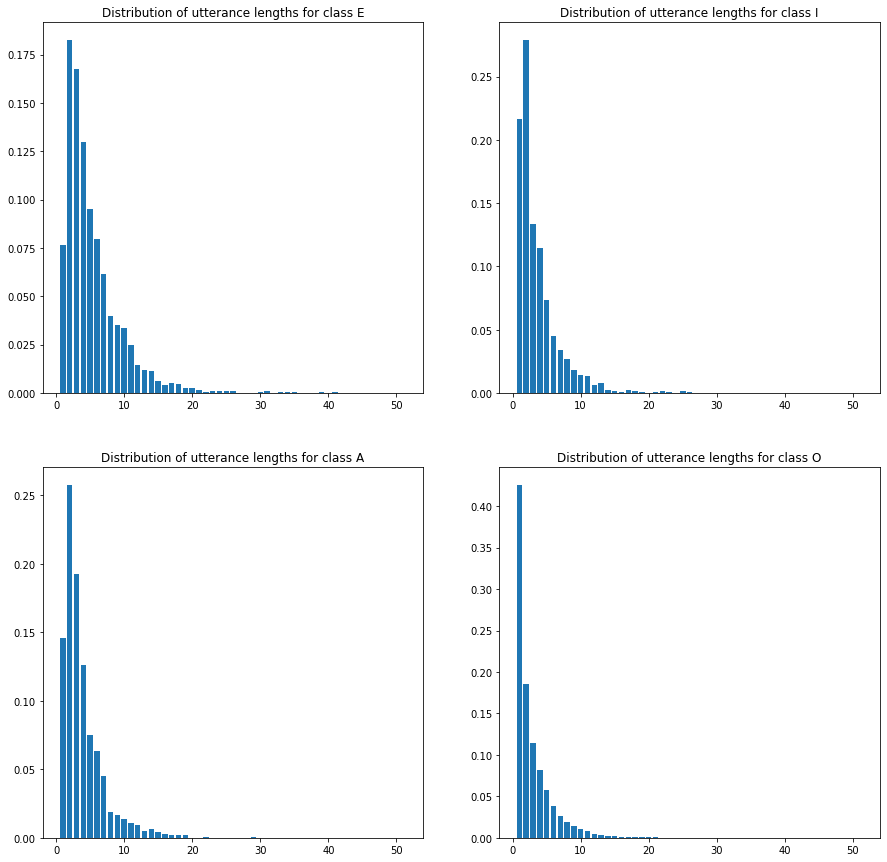

In [ ]:
from pyparsing import countedArray

# Get distribution of utterance lengths in groupby object
gb = df.groupby('intentClass')['utteranceLength'].value_counts(normalize=True).unstack(fill_value=0)

num = []
countE = []
countI = []
countA = []
countO = []

for col,data in gb.iteritems():
  num.append(col)
  countE.append(data['E'])
  countI.append(data['I'])
  countA.append(data['A'])
  countO.append(data['O'])

# Plot distribution of utterance lengths for each class
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].bar(num, countE)
axs[0, 0].set_title('Distribution of utterance lengths for class E')
axs[0, 1].bar(num, countI)
axs[0, 1].set_title('Distribution of utterance lengths for class I')
axs[1, 0].bar(num, countA)
axs[1, 0].set_title('Distribution of utterance lengths for class A')
axs[1, 1].bar(num, countO)
axs[1, 1].set_title('Distribution of utterance lengths for class O')

In [ ]:
# Get average utterances and utterance lengths per class
print(df.groupby('intentClass')['utterances'].mean())
print()
print(df.groupby('intentClass')['utteranceLength'].mean())

intentClass
A    1.518325
E    1.760488
I    1.539007
O    1.297672
Name: utterances, dtype: float64

intentClass
A    3.875509
E    5.286281
I    3.654255
O    2.932866
Name: utteranceLength, dtype: float64


O


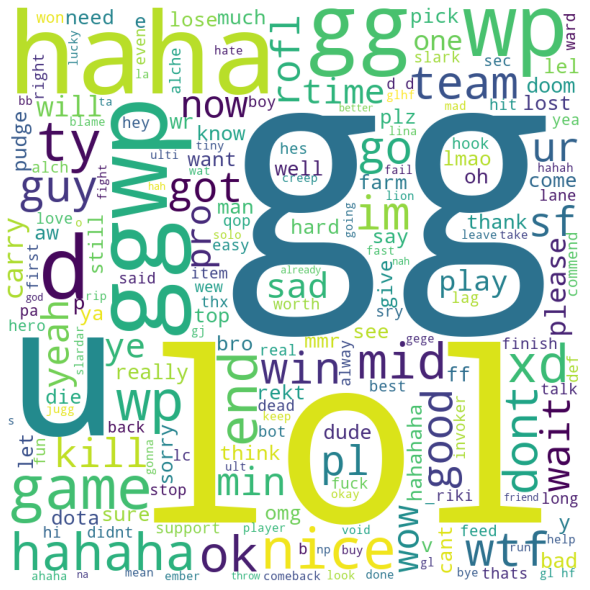

E


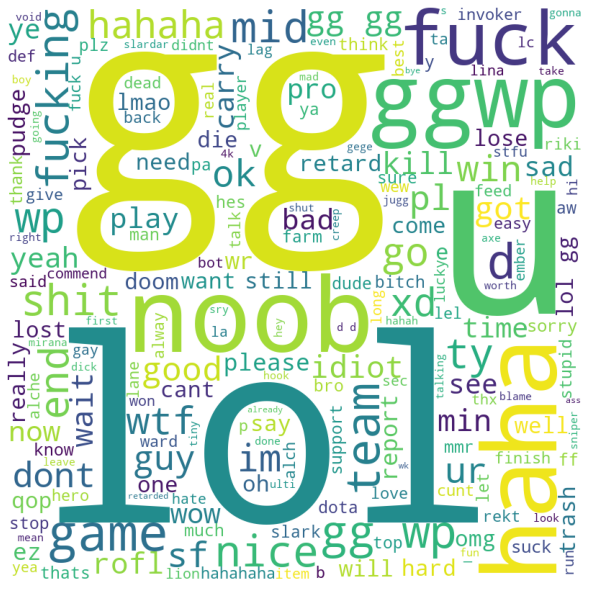

A


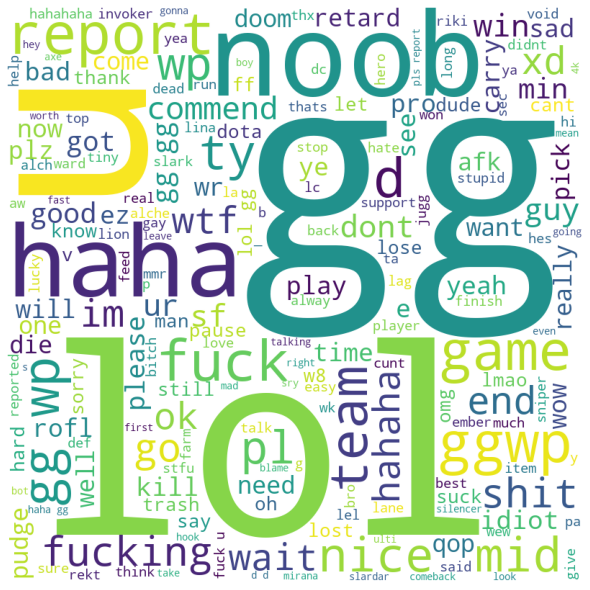

I


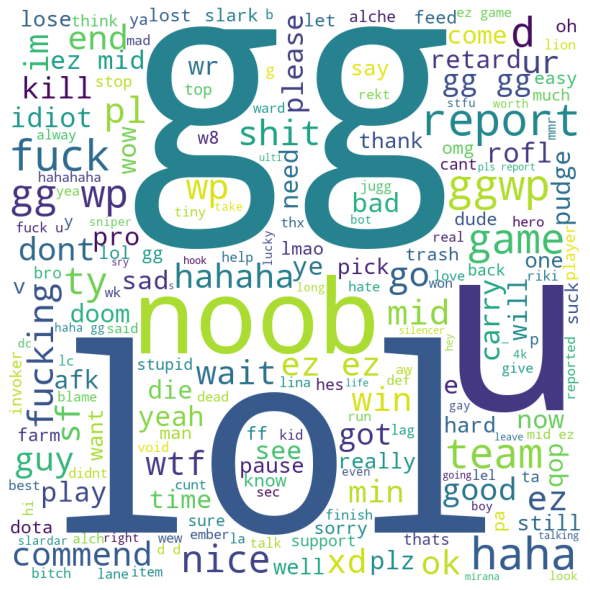

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file

for cat in df.intentClass.unique():
  print(cat)
  df2 = df.loc[df['intentClass'] == cat]
  for val in df2['utterance']:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

In [ ]:
gb = df.groupby('intentClass')['utterance'].apply(' '.join).reset_index()

print(gb)

  intentClass                                          utterance
0           A  gg report my team rat please g? Pls report sb ...
1           E  i cant play with 4 trash my arrows always dece...
2           I  ez mid ez ez game Thats all I gotta say Drow 2...
3           O  wow! WTF wpe wpe hahaha wtf bg =) ty hahah gh ...


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 5.8 MB 25.0 MB/s 
     |████████████████████████████████| 1.3 MB 52.1 MB/s 
     |████████████████████████████████| 182 kB 54.8 MB/s 
     |████████████████████████████████| 7.6 MB 37.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=b7df1f40193e3554a37b206cf1c933079eddcc8d1265188ef25c083ab3df6394
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

# Use bert sentence transformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Get document level embeddings
document_embeddings = sbert_model.encode(gb['utterance'])

# Calculate similarity matrices
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

print(pairwise_similarities)
print()
print(pairwise_differences)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

[[0.9999999  0.7734378  0.755821   0.7756788 ]
 [0.7734378  1.         0.795871   0.7500644 ]
 [0.755821   0.795871   0.99999976 0.76032037]
 [0.7756788  0.7500644  0.76032037 1.        ]]

[[ 0.        10.53405   10.932144  10.314382 ]
 [10.53405    0.        10.0498085 10.953794 ]
 [10.932144  10.0498085  0.        10.723268 ]
 [10.314382  10.953794  10.723268   0.       ]]


In [ ]:
# Get embeddings for utterances
embeddings = sbert_model.encode(df['utterance'])
print(embeddings)

[[ 3.9183182e-01 -2.3265530e-01  2.2776561e+00 ...  1.7976089e-01
  -5.0571553e-02  9.5217459e-02]
 [ 5.2598959e-01 -3.2393292e-01  2.1377020e+00 ... -1.7489393e-01
  -3.2440180e-01 -2.3651055e-01]
 [ 4.6560037e-01 -3.4872887e-01  2.0232818e+00 ... -4.9317095e-01
   2.8328288e-01 -2.3174338e-01]
 ...
 [ 2.6120141e-01 -1.4123975e-01  2.3311493e+00 ...  2.4198639e-01
   9.2915617e-02 -2.4583660e-02]
 [ 4.0698311e-01  1.6451065e-01  1.8671863e+00 ... -4.7140338e-02
  -6.4226717e-02  2.7386615e-01]
 [-2.8431302e-01 -1.8281244e-02  2.2305677e+00 ...  6.3109770e-04
   1.5975003e-01  1.7453773e-01]]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# PCA to reduce to two dimensions
pca = PCA(n_components=2)
embeddings = pca.fit_transform(embeddings)
print(embeddings)

[[-6.1169953  -1.0120718 ]
 [-3.0527432  -0.7440624 ]
 [-2.4408007  -0.9578963 ]
 ...
 [-6.1382666  -2.1276908 ]
 [-2.1544955  -0.24643254]
 [-5.80851    -0.08264433]]


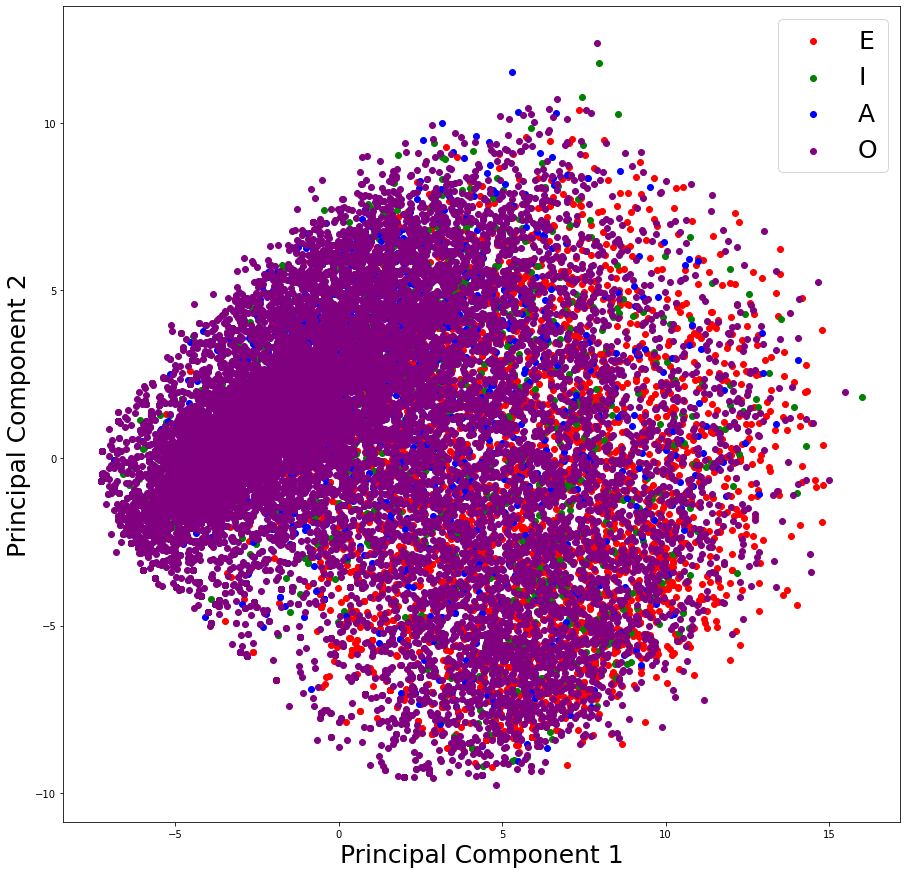

In [ ]:
# Get PCAs and labels
plot_df = pd.DataFrame(data = embeddings, columns = ['principal component 1', 'principal component 2'])
plot_df = pd.concat([plot_df, df[['intentClass']]], axis = 1)


# Plot points and label/color based on class
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
targets = ['E', 'I', 'A', 'O']
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = plot_df['intentClass'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'principal component 1']
               , plot_df.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets, fontsize=25)

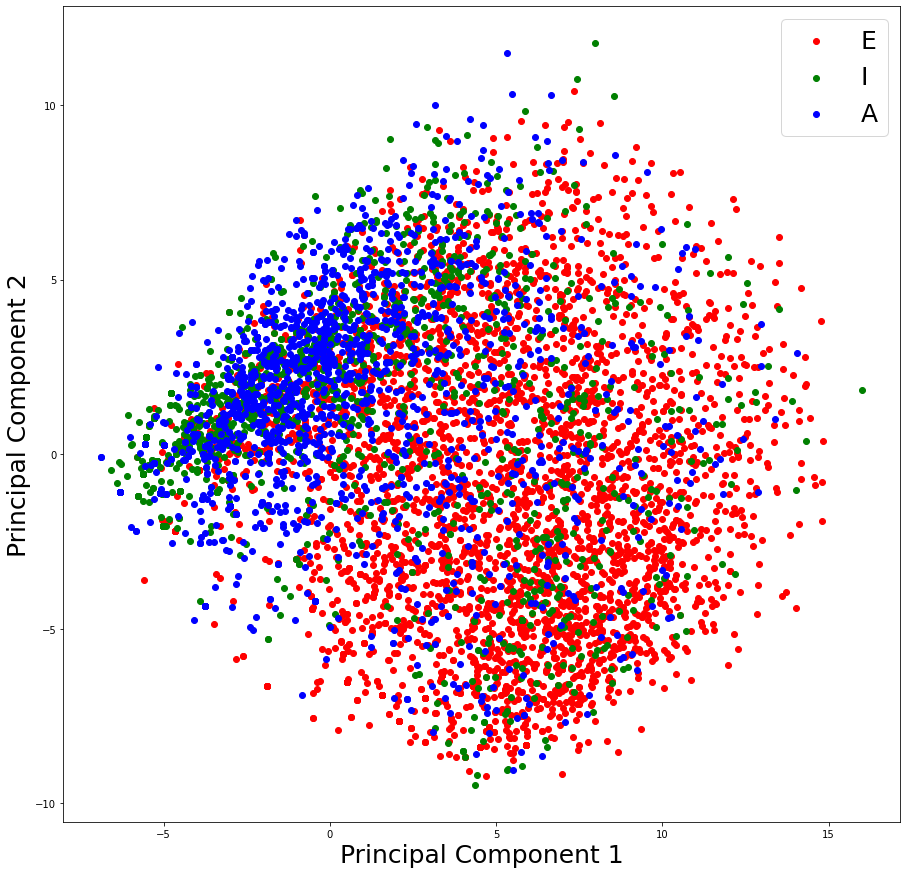

In [ ]:
# Remove O class and plot again
df = df[df.intentClass != 'O']
plot_df = pd.DataFrame(data = embeddings, columns = ['principal component 1', 'principal component 2'])
plot_df = pd.concat([plot_df, df[['intentClass']]], axis = 1)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
targets = ['E', 'I', 'A']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = plot_df['intentClass'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'principal component 1']
               , plot_df.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets, fontsize=25)